## bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

## DataSet

In [3]:
df = pd.read_csv('Mall_Customers.csv')
# https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


## Exploratory Analysis

size of the dataset

In [4]:
df.shape

(200, 5)

descriptive analysis of variables

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


visualizing the distribution of the variables

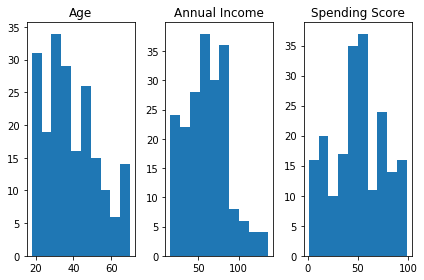

In [6]:
plt.subplot(1,3,1)
plt.hist(df['Age'])
plt.title('Age')
plt.subplot(1,3,2)
plt.hist(df['Annual Income (k$)'])
plt.title('Annual Income')
plt.subplot(1,3,3)
plt.hist(df['Spending Score (1-100)'])
plt.title('Spending Score')
plt.tight_layout()

boxplots to visualize outliers

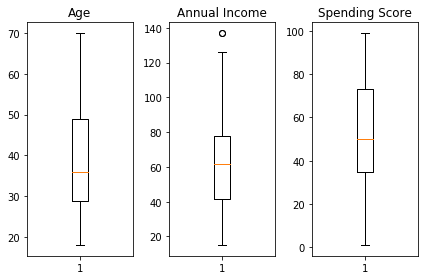

In [7]:
plt.subplot(1,3,1)
plt.boxplot(df['Age'])
plt.title('Age')
plt.subplot(1,3,2)
plt.boxplot(df['Annual Income (k$)'])
plt.title('Annual Income')
plt.subplot(1,3,3)
plt.boxplot(df['Spending Score (1-100)'])
plt.title('Spending Score')
plt.tight_layout()

Looking for missing data

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Finding the mean values of annual income for each age and seeing the top 5 ages with the biggest mean income

In [9]:
df_age = df.groupby('Age').agg({'Annual Income (k$)': 'mean'})
df_age.sort_values('Annual Income (k$)', ascending = False).head(5)

,Annual Income (k$)
Age,
41,101.000000
32,87.181818
28,85.250000
36,81.000000
33,80.333333


Checking if there is a correlation between age and income

In [10]:
df_age.reset_index().corr()

,Age,Annual Income (k$)
Age,1.000000,-0.120645
Annual Income (k$),-0.120645,1.000000


Finding the mean values of spending score for each age and seeing the top 5 ages with the biggest mean score

In [11]:
df_age2 = df.groupby('Age').agg({'Spending Score (1-100)': 'mean'})
df_age2.sort_values('Spending Score (1-100)', ascending = False).head(5)

,Spending Score (1-100)
Age,
39,84.666667
30,80.285714
29,76.600000
24,71.500000
22,70.000000


Checking if there is a correlation between age and income

In [12]:
df_age2.reset_index().corr()

,Age,Spending Score (1-100)
Age,1.000000,-0.454832
Spending Score (1-100),-0.454832,1.000000


Finding if there is a correlation between spending score and annual income

In [13]:
df[['Annual Income (k$)', 'Spending Score (1-100)']].corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


## Clustering the customers

Visualizating each customer graphically

Text(0.5, 0, 'Spending Score (1-100)')

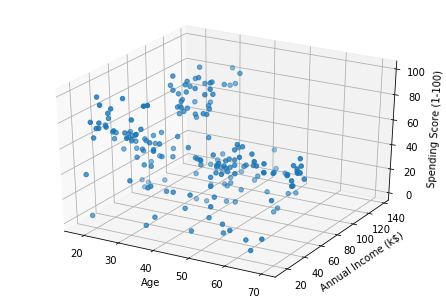

In [14]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

normalizating the variables

In [15]:
col = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
df_std = df.copy()
df_std=pd.DataFrame(preprocessing.scale(df_std[col]))
df_std.columns = col

Elbow method to determine the optimal number of groups

In [16]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(df_std[col])
    wcss.append(km.inertia_)

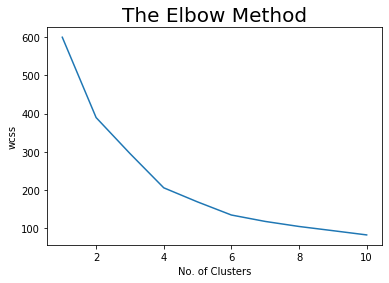

In [17]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter = 100, n_init = 25, random_state = 0).fit(df_std[col])
centroids = kmeans.cluster_centers_
df["clusters"] = kmeans.fit_predict(df_std[col])

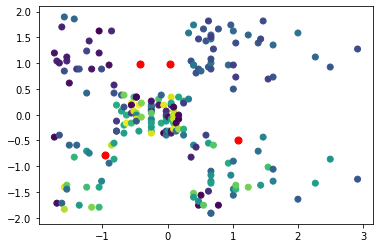

In [19]:
plt.scatter(df_std['Annual Income (k$)'], df_std['Spending Score (1-100)'], c= df_std['Age'])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

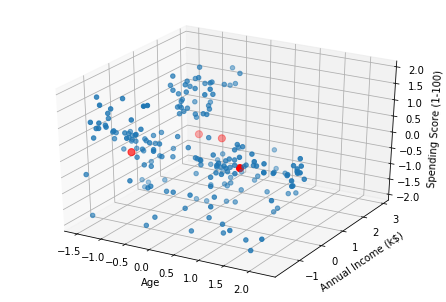

In [20]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_std['Age'], df_std['Annual Income (k$)'], df_std['Spending Score (1-100)'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

Visualizating each group

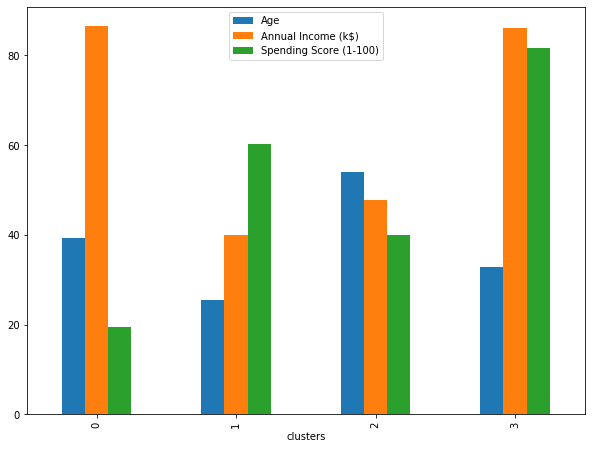

In [37]:
clusters = df.groupby('clusters')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
clusters.plot.bar(figsize=(10,7.5))

#### Groups Caracterization

* Group 0: This group represents the customers that have the highest mean annual income but a low spending score, so they have money to spend, but for some reason they are not spending in the mall, we could think about some marketing strategies focusing on this group specifically.
* Group 1: This group represents the customers that have a high spending score when compared to its annual income, they are the youngest group too, so we can think about marketing strategies focusing on young people who are used to spend more money on the mall.
* Group 2: This group represents the customers with the highest mean age, they have a spending score higher than the group 0, but lower than the Group 1, and they are the oldest group, so we can infer that they dont spend too much time on the mall.
* Group 3: This group represents the highest spenders with a high annual income, so they are the most important group for the mall.